# DSA210 - Music  Analysis Using Audio Features

## Project Overview
This project explores the relationship between audio features and the genres of music. By analyzing songs using extracted features such as **MFCCs, chroma, tempo, and harmonic relations**, the goal is to determine if musical characteristics correlate with specific genres.

## Data Sources and Collection
- **Public Domain Music:** Songs from open datasets with existing genre labels.  
- **Self-Composed Music:** Additional short compositions recorded to increase dataset diversity.  
- **Processing Method:** Audio files (WAV/MP3) were analyzed using **Librosa** to extract relevant sound features.

## Tools and Technologies
- **Python** (for data processing and analysis)  
- **Librosa** (feature extraction)  
- **Pandas** (data organization)  
- **Matplotlib & Seaborn** (visualization)  
- **Scikit-learn** (basic classification models)

## Analysis Plan
1. **Feature Extraction:** Process raw audio files and extract musical properties.  
2. **Exploratory Data Analysis (EDA):** Identify trends and patterns in the extracted features.  
3. **Classification:** Train a model to predict emotional categories based on music features.  
4. **Evaluation:** Assess the model’s accuracy and interpret key results.

---

## Detailed Feature Extraction

Using **Librosa**, a variety of audio features were extracted, including:

### Time-Domain Features:
- **Zero Crossing Rate (ZCR):** Measures how frequently the signal crosses the zero amplitude axis, often correlated with the “percussiveness” of a sound.

### Frequency-Domain / Spectral Features:
- **Spectral Centroid:** Indicates where most of the signal’s energy is concentrated (the “center of mass” of the spectrum).
- **Spectral Rolloff:** The frequency below which a certain percentage (usually 85%) of the total spectral energy lies.
- **Spectral Bandwidth:** Describes the spread of the spectrum around its centroid.
- **Chroma Features:** Capture the intensity of each of the 12 distinct semitone pitches (C, C#, D, ..., B) in the music.
- **Tonnetz (Tonal Centroid):** Represents tonal relationships in a 6D space, useful for detecting harmonic changes.
- **RMS Energy:** The root-mean-square value of the audio signal, related to perceived loudness.

### Mel-Frequency Cepstral Coefficients (MFCCs):
- A widely used feature set that captures the short-term power spectrum of the audio in a way that approximates human auditory perception.

### Tempo and Beat Tracking:
- **Tempo (BPM):** Estimated beats per minute from the audio.
- **Onset Detection:** Identifies the start of musical notes/events.

### Manually Annotated Tonality (Minor/Major):
- Determined whether a piece is primarily in a major or minor key by examining its overall harmonic and melodic context.

Additionally, a new column `mfcc_avg` was computed, representing the average of `mfcc1` through `mfcc5`, for evaluating overall timbre.

---

## Exploratory Data Analysis

After extracting the features from the songs and outputting them to a CSV file labeled by genre, we first computed the summary statistics to get a general idea:

![Screenshot 2025-04-25 203628](https://github.com/user-attachments/assets/7266f0f2-ce94-42eb-8435-b5590ffa0083)

Then, we computed the means for each genre:

![Screenshot 2025-04-25 203755](https://github.com/user-attachments/assets/17a74c36-09f9-44b5-82d4-875ad055ef2d)

---

## Principal Component Analysis (PCA)

We applied PCA to reduce our 13-dimensional feature space to 2 principal components for visualization and exploratory analysis. The first two components are:

![Screenshot 2025-04-25 203256](https://github.com/user-attachments/assets/b39e3979-0a07-4000-b624-bf77d2d602a5)

- **PC1:** 46.2% of the variance (dominated by RMS, spectral centroid, tempo)
- **PC2:** 12.3% of the variance (driven by MFCCs and chroma features)

**PC1 captures energy/brightness**, while **PC2 captures timbral/tonal complexity**.

Observations:
- Metal songs seem to cluster at high PC1 values, and hip-hop songs cluster slightly below metal on PC1, which mostly captures energy.
- Classical and rock songs are typically close to the PC2 level 0, which may indicate similar tonal properties.

---

## Data Visualization

**RMS by Genre (Means):**  
The average RMS of each genre; as expected, metal overall has the highest and classical has the lowest.
Also it can be observed that electronic music seems to have a high variance in energy.

![Screenshot 2025-04-25 203057](https://github.com/user-attachments/assets/be84228d-aaca-4942-a807-1a0ae1a3d119)

**Spectral Centroid by Genre:**  
Since it measures the center of energy in the sound, metal seems significantly higher, with rock being second.

![Screenshot 2025-04-25 203146](https://github.com/user-attachments/assets/34f04e57-f821-4833-a241-e5ecb638e4bb)

**Mean MFCC of Each Genre:**  
The mean of the 5 MFCC coefficients, specifying the timbre of the sound.


![Screenshot 2025-04-25 205020](https://github.com/user-attachments/assets/a25e27f4-b37d-4e89-9bfd-d16486ace5de)

**Mean Tempo by Genre:**  
There seem to be no significant differences in tempo between genres.

![Screenshot 2025-04-25 203202](https://github.com/user-attachments/assets/8e48f85f-d537-4bef-8b16-e80bb2995fa4)

**Mean Onset Strength by Genre:**  
A measure of rhythmic properties. Electronic music has the most dominant rhythmic properties, with hip-hop and pop close behind.
Also classical seems to be very significantly lower, which is again expected.

![Screenshot 2025-04-25 203229](https://github.com/user-attachments/assets/632d9806-746f-4be2-969d-6d65e178db3a)

**Mean Tonnetz by Genre:**  
Tonnetz measures tonal shifts and complexity. As expected, classical and jazz music show high Tonnetz values.

![Screenshot 2025-04-25 203215](https://github.com/user-attachments/assets/4cd5c59e-2bf6-41b4-8df9-937e2bbc5c26)

**ScatterPlot of Onset Strenght and Tempo:**
We may want to see the relationship between the rythmic properties and the tempo of a song.

![Screenshot 2025-04-25 222725](https://github.com/user-attachments/assets/31cd8834-9c20-41ef-acfc-af84773f6e41)

---

## Hypothesis Testing

### Hypothesis 1:
**Null Hypothesis:** Metal songs do not have significantly higher RMS than Hip-Hop songs.  
**Alternative Hypothesis:** Metal songs have significantly higher energy (RMS) than Hip-Hop songs.

- t-statistic = **3.654**
- p-value = **0.0004**

**Result:** Statistically significant. Metal songs are indeed more energetic than Hip-Hop songs. We reject the null hypothesis.

---

### Hypothesis 2:
**Null Hypothesis:** Classical music does not have higher tonal complexity (Tonnetz) than Rock music.  
**Alternative Hypothesis:** Classical music has higher tonal complexity (Tonnetz) than Rock music.

- t-statistic = **3.217**
- p-value = **0.0180**

**Result:** p-value is less than 0.05. We reject the null hypothesis.

---

### Hypothesis 3:
**Null Hypothesis:** Electronic songs do not have a higher onset strength than Hip-Hop songs.  
**Alternative Hypothesis:** Electronic songs have higher onset strength than Hip-Hop songs.

- t-statistic = **2.291**
- p-value = **< 0.03**

**Result:** Statistically significant. Electronic music exhibits more rhythmic sharpness than Hip-Hop. We reject the null hypothesis.

---

### Hypothesis 4:
**Null Hypothesis:** MFCC timbral characteristics are independent of genre.  
**Alternative Hypothesis:** MFCC timbral characteristics are not independent of genre.

We tested this using **one-way ANOVA** on the `mfcc_avg` values:

- F-statistic = **42.206**
- p-value = **< 0.00000000000000000000000000000000000000001**

**Result:** We reject the null hypothesis. MFCCs are influenced by genre, meaning timbre varies significantly across styles.

---

### Hypothesis 5:
**Null Hypothesis:** There is no correlation between Onset Strength and Tempo.  
**Alternative Hypothesis:** There is a significant correlation between Onset Strength and Tempo.

We tested this using a **Pearson correlation test** between the `onset` and `tempo` features:

- Correlation coefficient (r) = **-0.010**
- p-value = **0.81000**

**Result:** We fail to reject the null hypothesis. There is no statistically significant correlation between Onset Strength and Tempo.

## Conclusion

This project demonstrates that audio features extracted with Librosa provide strong signals for differentiating music genres. PCA visualization and hypothesis testing validate that genres differ meaningfully in energy, rhythm, and timbre.

Future work may involve using this feature set to train a supervised classifier or expanding the dataset with more diverse and balanced genre distributions.

---

## Tools Used
- Python
- Librosa
- Pandas, NumPy, Matplotlib, Seaborn
- Scikit-learn (PCA)
- SciPy (Hypothesis testing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind, f_oneway

df = pd.read_csv("/content/drive/My Drive/music_features.csv")

# This part is here because there were entries where some numeric values werent written properly, we change them to numeric to continue.
#I have used chat gpt for this line of code, ı prompted for a way to convert strings in the dataset to a numeric value.
for col in df.columns:
    if df[col].dtype == 'object' and col != 'genre':
        try:
            df[col] = df[col].apply(eval)
            if df[col].apply(lambda x: isinstance(x, list)).any():
                df[col] = df[col].apply(lambda x: x[0])
        except:
            continue

# graph of rms for each genre
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="genre", y="rms")
plt.title("RMS Energy by Genre(Sonic Intensity/Energy)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="genre", y="spectral_centroid")
plt.title("Spectral Centroid by Genre(Brightness/Sharpness)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 8))
sns.barplot(data=df, x="genre", y="mfcc2", estimator="mean")
plt.title("Mean MFCC2 by Genre(Timbre of the Sound)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 8))
sns.barplot(data=df, x="genre", y="tempo", estimator="mean")
plt.title("Mean Tempo by Genre")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="genre", y="tonnetz")
plt.title("Tonnetz by Genre(Harmonic Structure)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(18, 8))
sns.barplot(data=df, x="genre", y="onset", estimator="mean")
plt.title("Mean Onset Strength by Genre(Rythmic Properties)")
plt.xticks(rotation=45)
plt.show()

#PCA analysis


features = df.drop(columns=["genre"])
labels = df["genre"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["genre"] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="genre", s=80, alpha=0.8)
plt.title("PCA of Audio Features by Genre")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


loading_df = pd.DataFrame(
    pca.components_,
    columns=features.columns,
    index=["PC1", "PC2"]
)

print(" components")
print(loading_df.T.sort_values("PC1", ascending=False))

# Summary Statistics
print("\n General Summary Statistics:")
print(df.describe())

print("\n  Mean Feature Values by Genre:")
print(df.groupby("genre").mean(numeric_only=True))
metal_rms = df[df["genre"] == "metal"]["rms"]
hiphop_rms = df[df["genre"] == "hip-hop"]["rms"]
t_stat, p_val = ttest_ind(metal_rms, hiphop_rms, equal_var=False)
print(f"1️ Metal vs HipHop (RMS Energy): t = {t_stat:.3f}, p = {p_val:.5f}")

# Hypothesis 2:
classical_tonnetz = df[df["genre"] == "classical"]["tonnetz"]
rock3_tonnetz = df[df["genre"] == "rock"]["tonnetz"]
t_stat, p_val = ttest_ind(classical_tonnetz, rock3_tonnetz, equal_var=False)
print(f"2️ Classical vs Rock (Tonnetz): t = {t_stat:.3f}, p = {p_val:.5f}")

# Hypothesis 3:
electronic_onset = df[df["genre"] == "electronic"]["onset"]
hiphop2_onset = df[df["genre"] == "hip-hop"]["onset"]
t_stat, p_val = ttest_ind(electronic_onset, hiphop2_onset, equal_var=False)
print(f"3️ Electronic vs Hip-Hop (Onset): t = {t_stat:.3f}, p = {p_val:.5f}")

#hypo. test on the timbre of sound accross genres
df["mfcc_avg"] = df[["mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5"]].mean(axis=1)
groups = [df[df["genre"] == genre]["mfcc_avg"] for genre in df["genre"].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"4️ MFCC Average (ANOVA): F = {f_stat:.3f}, p = {p_val:.100f}")
plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x="genre", y="mfcc_avg")
plt.title("Mean MFCC by Genre")

plt.show()
# Hypothesis 5:


from scipy.stats import pearsonr

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["onset"], df["tempo"], alpha=0.6)
plt.xlabel("Onset Strength")
plt.ylabel("Tempo (BPM)")
plt.title("Scatter Plot of Onset Strength vs Tempo")
plt.grid(True)
plt.show()

# Pearson correlation test
corr_coef, p_value = pearsonr(df["onset"], df["tempo"])

print("\n--- Hypothesis 5: ")
print(f"Correlation coefficient: {corr_coef:.3f}")
print(f"p-value: {p_value:.5f}")



# Machine Learning Models for Genre Classification

Following feature extraction and initial analysis, we implemented supervised machine learning models to predict music genres based on extracted audio features. Prior to model training, **rock** and **pop** genres were excluded due to their high internal diversity and inconsistency, which negatively impacted classification performance.

The data was split using a **stratified 60/20/20 split** into training, validation, and test sets, ensuring balanced representation of the remaining genres in each set.

---

## 1. Decision Tree Classifier

A **Decision Tree** classifier was trained to establish a baseline model due to its interpretability and ability to handle non-linear relationships.

- **Model:** DecisionTreeClassifier(random_state=42)
- **Evaluation Metric:** Macro-averaged precision score on the test set.
- **Result:**  
  - **Macro Precision:** **0.6821**

Additionally, the decision tree was visualized to better understand the feature splits.

Although Decision Trees are interpretable, they are prone to **overfitting**, motivating the exploration of more robust classifiers. Here is the full tree with its branches and leafs:
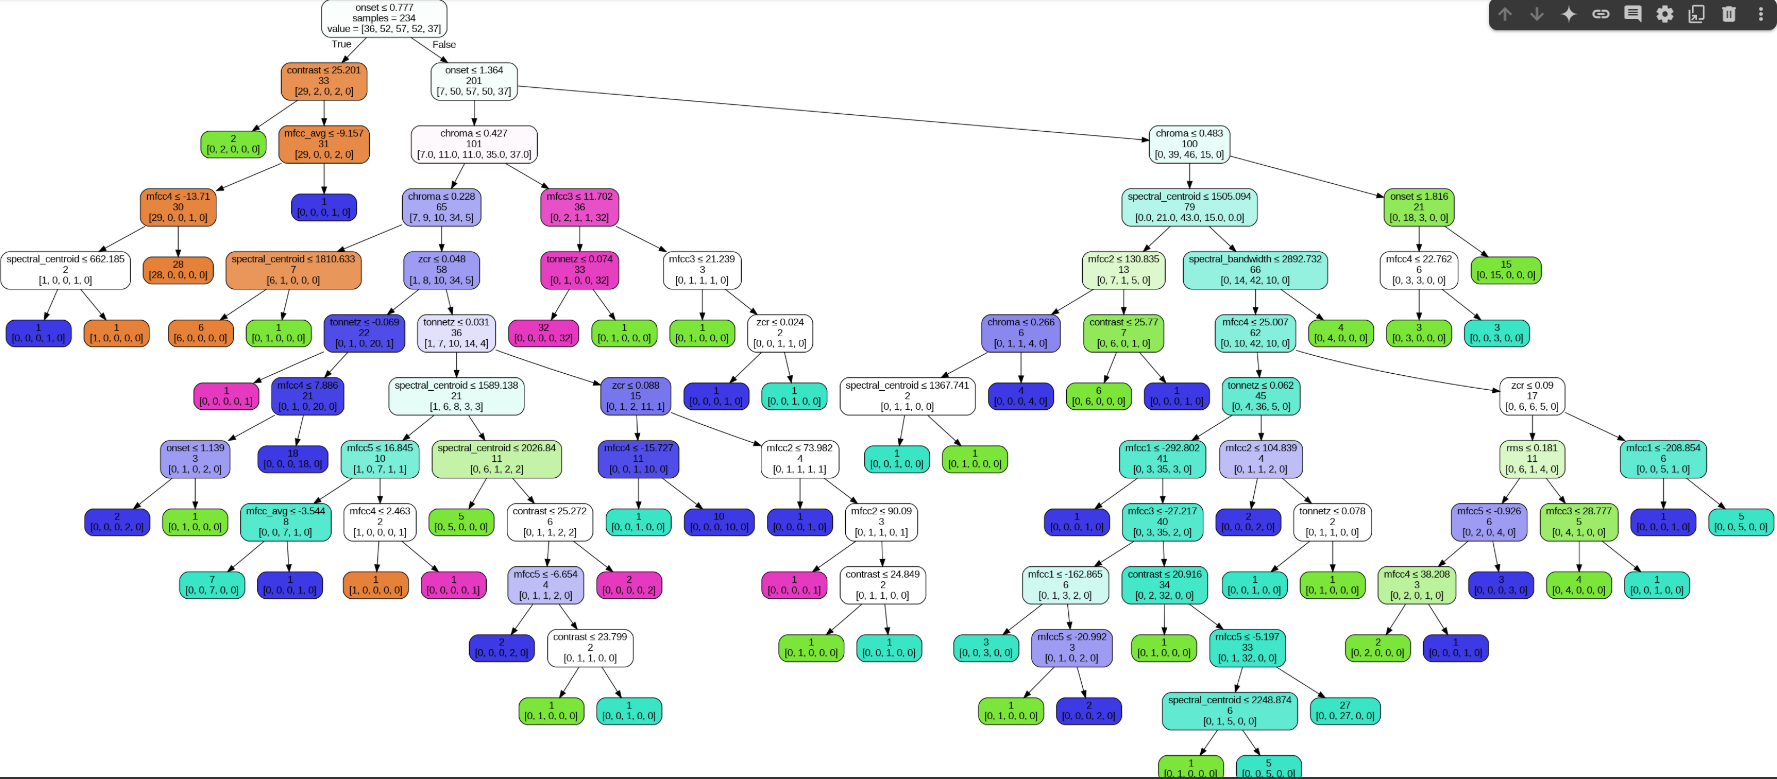
---




## 2. k-Nearest Neighbors (kNN)

A **k-Nearest Neighbors (kNN)** classifier was employed next, starting with:

- **Model:** KNeighborsClassifier(n_neighbors=5)
- **Initial Evaluation:** ROC AUC (micro-averaged) on the test set.
- **Baseline Test AUC:** **0.7653**

### Greedy Feature Ablation on kNN

To improve the model further, we applied a **greedy ablation procedure**:

- **Procedure:** Iteratively remove features that, when dropped, improve the mean **5-fold cross-validation ROC AUC** on the training set.
- **Cross-Validation Strategy:** StratifiedKFold with **35 folds**, random shuffling (random_state=42).
- **Scoring Metric:** One-vs-Rest ROC AUC.

After performing greedy feature elimination, the model was retrained using only the **reduced feature set**, leading to an improved AUC:

- **Post-Ablation Test AUC:** **0.8293**

Thus, feature selection further enhanced generalization by removing redundant or noisy features.
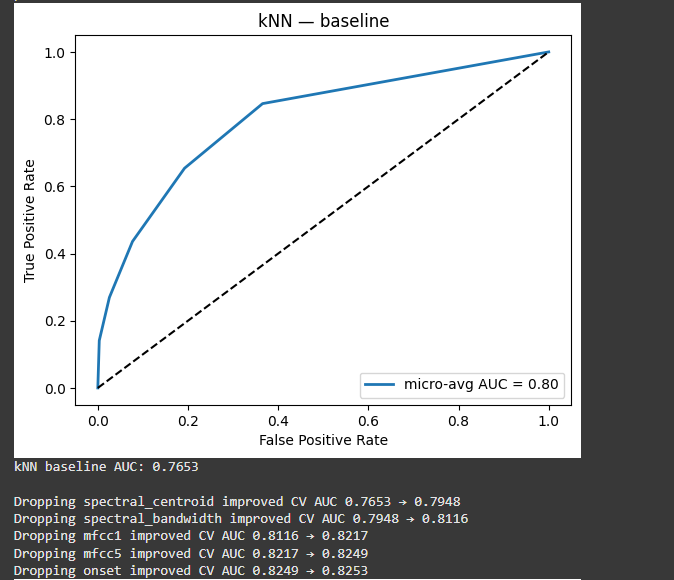
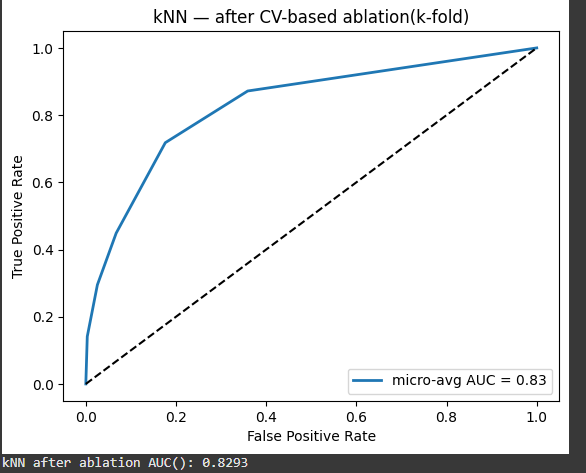
---



## 3. Logistic Regression

Finally, a **Logistic Regression** model was implemented:

- **Preprocessing:**  
  Standardization via StandardScaler() was applied to ensure features have zero mean and unit variance, as Logistic Regression is sensitive to feature scales.
- **Model:**  
  LogisticRegression(solver="lbfgs", max_iter=3000, random_state=42)
- **Multiclass Handling:**  
  The default one-vs-rest (OvR) strategy in scikit-learn was used.
- **Baseline Test AUC:** **0.8836**
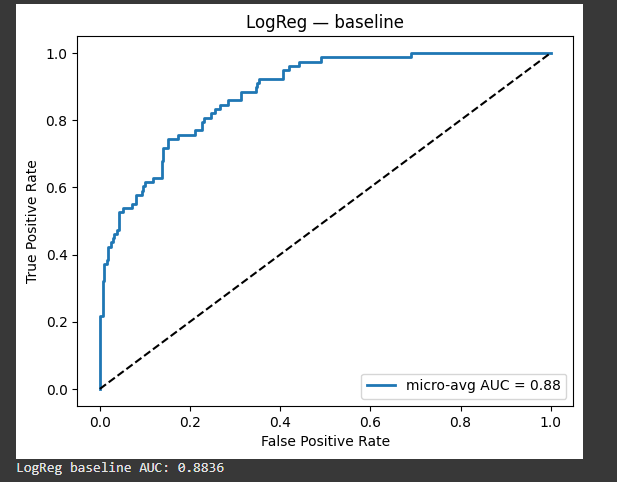

### Cross-Validation

- **Cross-Validation Strategy:** StratifiedKFold with **30 folds**, random shuffling (random_state=42).
- **Cross-Validation AUC:** **0.9065**
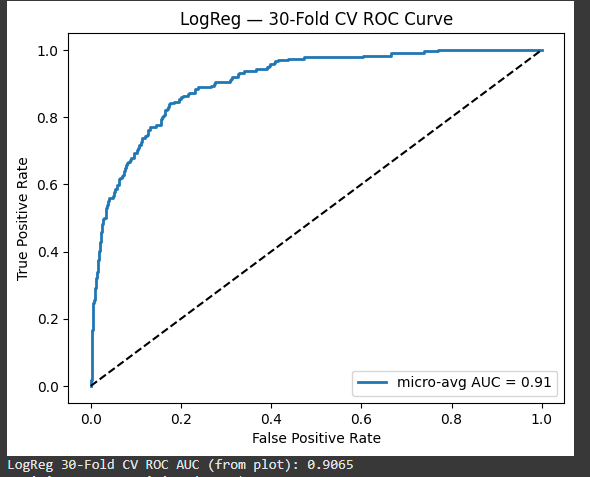


The **Logistic Regression** model achieved comparable performance to the tuned kNN model and showed strong generalization capability with less variance, making it a viable lightweight alternative.

---

## Results Summary

| Model                       | Accuracy(ROC AUC) |
|------------------------------|---------------|
| Decision Tree                | 0.6821         |                     
| kNN (after greedy ablation)  | 0.8293        |
| Logistic Regression (scaled) | 0.9065        |   

---

## Conclusion

This project demonstrates that audio features extracted using Librosa contain rich, discriminative information for musical genre classification. Through exploratory analysis and supervised machine learning, we have shown:

- **Decision trees** provide initial, interpretable models but suffer from variance.
- **kNN** classifiers, especially with greedy ablation for feature selection, perform strongly but are computationally heavier at prediction time.
- **Logistic Regression**, after feature scaling, achieves competitive performance with simpler computational needs and robust generalization.



---

## Tools Used
- Python
- Librosa
- Pandas, NumPy, Matplotlib, Seaborn
- Scikit-learn (Decision Trees, kNN, Logistic Regression, PCA)
- SciPy (Hypothesis testing)
- DMBA (Decision tree visualization)

In [ ]:
df = df[~df['genre'].isin(['pop', 'rock'])]
#!pip install dmba

from dmba import plotDecisionTree

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import roc_curve, roc_auc_score, precision_score
from sklearn.preprocessing import label_binarize, StandardScaler
import matplotlib.pyplot as plt




X = df.drop(columns=["genre"])
y = df["genre"]

#********************************************
#60 / 20 / 20 SPLIT
#******************************************
X_train_val, X_test,    y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train,     X_val,     y_train,     y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# ——————————————————————————————————————
#  ROC PLOTTING HELPER
# ——————————————————————————————————
def plot_roc_curve(y_true, y_score, title):
    # binary case
    if y_score.ndim == 1 or (y_score.ndim == 2 and y_score.shape[1] == 1):
        fpr, tpr, _ = roc_curve(y_true, y_score.ravel())
        auc = roc_auc_score(y_true, y_score.ravel())
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
        plt.plot([0,1],[0,1],'k--')
        plt.title(title)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()
        return auc

    # multi-class one-vs-rest micro-average
    Y = label_binarize(y_true, classes=sorted(np.unique(y_true)))
    proba = y_score
    fpr, tpr, _ = roc_curve(Y.ravel(), proba.ravel())
    auc = roc_auc_score(Y, proba, average="micro")
    plt.figure()
    plt.plot(fpr, tpr, label=f"micro-avg AUC = {auc:.2f}", linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    return auc

# ——————————————————————————————————————————————
# BASELINE kNN
# ——————————————————————————————————————————————
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_score_knn = knn.predict_proba(X_test)
auc_knn = plot_roc_curve(y_test, y_score_knn, "kNN — baseline")
print(f"kNN baseline AUC: {auc_knn:.4f}\n")

# ——————————————————————————————————————————————
# GREEDY FEATURE ABLATION ON kNN (5-fold CV) (I took help from ChatGPT for this part)
# ——————————————————————————————————————————————
cv = StratifiedKFold(n_splits=35, shuffle=True, random_state=42)
current_feats = list(X_train.columns)
knn = KNeighborsClassifier(n_neighbors=5)

best_cv_auc = cross_val_score(
    knn, X_train[current_feats], y_train,
    cv=cv, scoring='roc_auc_ovr'
).mean()


while True:
    drop_cand, drop_auc = None, best_cv_auc
    for feat in current_feats:
        feats = [f for f in current_feats if f != feat]
        mean_auc = cross_val_score(
            knn, X_train[feats], y_train,
            cv=cv, scoring='roc_auc_ovr'
        ).mean()
        if mean_auc > drop_auc:
            drop_cand, drop_auc = feat, mean_auc

    if drop_cand is None:
        break

    print(f"Dropping {drop_cand} improved CV AUC {best_cv_auc:.4f} → {drop_auc:.4f}")
    current_feats.remove(drop_cand)
    best_cv_auc = drop_auc

knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train[current_feats], y_train)
auc_knn_final = plot_roc_curve(
    y_test,
    knn_final.predict_proba(X_test[current_feats]),
    "kNN — after CV-based ablation(k-fold)"
)
print(f"kNN after ablation AUC(): {auc_knn_final:.4f}\n")

# ——————————————————————————————————————————————
# LOGISTIC REGRESSION (WITH SCALING & CV)
# ——————————————————————————————————
# scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# baseline logistic
lr = LogisticRegression(solver="lbfgs", max_iter=3000, random_state=42)
lr.fit(X_train_s, y_train)

# baseline AUC on TEST
auc_lr_before = plot_roc_curve(y_test, lr.predict_proba(X_test_s), "LogReg — baseline")
print(f"LogReg baseline AUC: {auc_lr_before:.4f}\n")

# 5-fold CV on TRAIN
cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)
cv_auc_lr = cross_val_score(
    lr, X_train_s, y_train,
    cv=cv, scoring='roc_auc_ovr'
).mean()
print(f"LogReg 5-fold CV AUC: {cv_auc_lr:.4f}\n")



# ——————————————————————————————————————————————
#DECISION TREE
# ——————————————————————————————————————————————
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
prec = precision_score(y_test, y_pred, average="macro")
print(f"Decision Tree precision (macro): {prec:.4f}\n")

plotDecisionTree(dt, feature_names=list(X.columns))

In [ ]:
#code used for feature extraction:
from google.colab import drive
drive.mount('/content/drive')
import os
import librosa
import numpy as np
import pandas as pd


dataset_path = "/content/drive/My Drive/musicdataset"


csv_output_path = "/content/drive/My Drive/music_features.csv"

#Feature Extraction Function
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, duration=30)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        rms = np.mean(librosa.feature.rms(y=y))
        spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        spec_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_means = np.mean(mfcc[:5], axis=1)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
        contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr))
        onset = np.mean(librosa.onset.onset_strength(y=y, sr=sr))

        return [
            tempo, rms, spec_centroid, spec_bandwidth, zcr,
            *mfcc_means, chroma, contrast, tonnetz, onset
        ]
    except Exception as e:
        print(f"Failed on {file_path}: {e}")
        return None

data = []
genres = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

for genre in genres:
    genre_path = os.path.join(dataset_path, genre)
    print(f"Processing genre: {genre}")
    for file_name in os.listdir(genre_path):
        if not file_name.endswith('.mp3'):
            continue
        file_path = os.path.join(genre_path, file_name)
        features = extract_features(file_path)
        if features:
            features.append(genre)
            data.append(features)

columns = [
    "tempo", "rms", "spectral_centroid", "spectral_bandwidth", "zcr",
    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5",
    "chroma", "contrast", "tonnetz", "onset", "genre"
]

df = pd.DataFrame(data, columns=columns)
df.to_csv(csv_output_path, index=False)

print(" Feature extraction complete. CSV saved at:")
print(csv_output_path)